<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/assignment4/c)_transfer_learning_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CMPE258 - Graded Assignment 4 : CNNs

# c) transfer learning with CNN

In [3]:
%matplotlib inline
import cv2
import pandas as pd
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, time
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import layer_utils
from keras import backend as K
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


### **Download and prprocess Dataset**

In [2]:
#Enable GPU e
print(tf.__version__)
print(tf.test.gpu_device_name())

2.2.0
/device:GPU:0


he list of breeds is as follows:"

affenpinscher afghan_hound african_hunting_dog airedale american_staffordshire_terrier appenzeller australian_terrier basenji basset beagle bedlington_terrier bernese_mountain_dog black-and-tan_coonhound blenheim_spaniel bloodhound bluetick border_collie border_terrier borzoi boston_bull bouvier_des_flandres boxer brabancon_griffon briard brittany_spaniel bull_mastiff cairn cardigan chesapeake_bay_retriever chihuahua chow clumber cocker_spaniel collie curly-coated_retriever dandie_dinmont dhole dingo doberman english_foxhound english_setter english_springer entlebucher eskimo_dog flat-coated_retriever french_bulldog german_shepherd german_short-haired_pointer giant_schnauzer golden_retriever gordon_setter great_dane great_pyrenees greater_swiss_mountain_dog groenendael ibizan_hound irish_setter irish_terrier irish_water_spaniel irish_wolfhound italian_greyhound japanese_spaniel keeshond kelpie kerry_blue_terrier komondor kuvasz labrador_retriever lakeland_terrier leonberg lhasa malamute malinois maltese_dog mexican_hairless miniature_pinscher miniature_poodle miniature_schnauzer newfoundland norfolk_terrier norwegian_elkhound norwich_terrier old_english_sheepdog otterhound papillon pekinese pembroke pomeranian pug redbone rhodesian_ridgeback rottweiler saint_bernard saluki samoyed schipperke scotch_terrier scottish_deerhound sealyham_terrier shetland_sheepdog shih-tzu siberian_husky silky_terrier soft-coated_wheaten_terrier staffordshire_bullterrier standard_poodle standard_schnauzer sussex_spaniel tibetan_mastiff tibetan_terrier toy_poodle toy_terrier vizsla walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier whippet wire-haired_fox_terrier yorkshire_terrier

Reference: https://www.kaggle.com/c/dog-breed-identification

- train.zip - the training set, you are provided the breed for these dogs
- test.zip - the test set, you must predict the probability of each breed for each image
- sample_submission.csv - a sample submission file in the correct format
- labels.csv - the breeds for the images in the train set

https://www.kaggle.com/prashantkashyap/dog-breed-identification-dataset

In [63]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root_dir = '/content/drive/My Drive/'
base_dir = root_dir + 'CMPE258/assignment4/'
data_path =base_dir+'data_dog/'

In [112]:
%cd /content/drive/My\ Drive/CMPE258/assignment4/data_dog/train

/content/drive/My Drive/CMPE258/assignment4/data_dog/train


In [113]:
!unzip /content/drive/My\ Drive/CMPE258/assignment4/data_dog/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: 83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: 83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: 83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: 83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: 83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: 83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: 83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: 83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: 83fad0718581a696132c96c166472627.jpg  
  inflating: 83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: 8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: 8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: 840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: 840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: 840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: 8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: 841463629c4833816e216cbb041c2778.jpg  
  inflating: 8429dcca4ae91c4e0345e4ba48b0d69f.jpg  
  inflating: 

In [114]:
!ls

000bec180eb18c7604dcecc8fe0dba07.jpg  813f7061a301759e6fe78f360ff4cd07.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg  8141b7ef2da931d7441d3c883ce65b57.jpg
001cdf01b096e06d78e9e5112d419397.jpg  8141c029e973ca29be09417267d1e50b.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg  814a9fc5db2614bbe59328c16496b50e.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg  814be837610c46b122ff45f71e97133d.jpg
002211c81b498ef88e1b40b9abf84e1d.jpg  815079d1d62429b3134f2afa1a53ef65.jpg
00290d3e1fdd27226ba27a8ce248ce85.jpg  815949fad325d5bd758bd46c2bbccfaf.jpg
002a283a315af96eaea0e28e7163b21b.jpg  815d3c084bcb79bed798a9774d4ce66b.jpg
003df8b8a8b05244b1d920bb6cf451f9.jpg  8161ff9d8b2b1b91280f268463c51065.jpg
0042188c895a2f14ef64a918ed9c7b64.jpg  8165da6ab285d889a8a6f1980aad5869.jpg
004396df1acd0f1247b740ca2b14616e.jpg  81662662eb22135f0438459487722f98.jpg
0067dc3eab0b3c3ef0439477624d85d6.jpg  816da6c9a52fa67ad45bee98657e541b.jpg
00693b8bc2470375cc744a6391d397ec.jpg  816f335f43b007f659fc7f8527301661.jpg
006cc3ddb9dc1bd827479569f

In [107]:
%cd /content/drive/My\ Drive/CMPE258/assignment4/data_dog/test

/content/drive/My Drive/CMPE258/assignment4/data_dog/test


In [110]:
!unzip /content/drive/My\ Drive/CMPE258/assignment4/data_dog/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: 82e41a906dbd9ec362a3d49cf6bbe645.jpg  
  inflating: 82e5e34cc18b267ef7057cc92de8b44b.jpg  
  inflating: 82e64f28df4fff22beb11e9a1e413212.jpg  
  inflating: 82ec6bdf968a14923340179515ce5546.jpg  
  inflating: 82ee3ee4dc01b33203a049c6c3338034.jpg  
  inflating: 82f07a63a1f03ff9d8e0f4a8458caa93.jpg  
  inflating: 82f5fb0bdaff30a4a3374e2d9915856c.jpg  
  inflating: 82fbff1bd375474e3d4ec5cbfde3f9f0.jpg  
  inflating: 8301c772feb7f4068473f0157ae58f9b.jpg  
  inflating: 8307be57a9d76c1584e16801a39cb1dc.jpg  
  inflating: 831a38bd2cfa0a093967d5b6c1ac09dc.jpg  
  inflating: 831ef824af939f9754e3593638933b64.jpg  
  inflating: 8322f53b29325419ef3bcf7cf10d7172.jpg  
  inflating: 83233e2774e116ef34a04c53dd00a282.jpg  
  inflating: 832cae23410e741ecd2014b3818ed7c4.jpg  
  inflating: 833f90a3652b06607b55bd25c8d97457.jpg  
  inflating: 8341f50a86c819b3cb8828740a97e7ef.jpg  
  inflating: 834bb31410410852082813d2e07c3290.jpg  
  inflating: 

In [111]:
!ls

000621fb3cbb32d8935728e48679680e.jpg  7e83dca4123053e9e5d15fb236da7fff.jpg
00102ee9d8eb90812350685311fe5890.jpg  7e8665d06f96c4ba70a38e0aa1348c2a.jpg
0012a730dfa437f5f3613fb75efcd4ce.jpg  7e8784694efb44bde9446359f95e2781.jpg
001510bc8570bbeee98c8d80c8a95ec1.jpg  7e8b64637f260d3e678356839ae94fb2.jpg
001a5f3114548acdefa3d4da05474c2e.jpg  7e90f58b3b345fd50ac313cc1087afda.jpg
00225dcd3e4d2410dd53239f95c0352f.jpg  7e9ea302a3f645152c00b09764c8a272.jpg
002c2a3117c2193b4d26400ce431eebd.jpg  7ea4c56ab111f57f3dbf8c94d6f110a2.jpg
002c58d413a521ae8d1a5daeb35fc803.jpg  7eb338f7e624a1cc1d06d48e53a7f51c.jpg
002f80396f1e3db687c5932d7978b196.jpg  7eb470b7b4efcbcdb88cd8a249fbafcf.jpg
0036c6bcec6031be9e62a257b1c3c442.jpg  7ebdd13f29a86637dffab6a2bf6945a4.jpg
0041940322116ae58c38130f5a6f71f9.jpg  7ec1f8619acffa977120be7ca83588fd.jpg
0042d6bf3e5f3700865886db32689436.jpg  7ec3929c60fe70208989c9882722a25b.jpg
004476c96f575879af4af471af65cae8.jpg  7ec8e254a7a22d7302c101b814cb48b4.jpg
00485d47de966a9437ad3b33a

In [117]:
%cd /content/drive/My\ Drive/CMPE258/assignment4/data_dog/

/content/drive/My Drive/CMPE258/assignment4/data_dog


In [0]:
labels = pd.read_csv('labels.csv')

In [121]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [0]:
labels_dict = {i:j for i,j in zip(labels['id'],labels['breed'])}
classes = set(labels_dict.values())

In [144]:
print(classes)

{'dhole', 'yorkshire_terrier', 'mexican_hairless', 'tibetan_terrier', 'ibizan_hound', 'labrador_retriever', 'bull_mastiff', 'rottweiler', 'west_highland_white_terrier', 'dingo', 'irish_wolfhound', 'staffordshire_bullterrier', 'irish_water_spaniel', 'german_shepherd', 'wire-haired_fox_terrier', 'lhasa', 'miniature_poodle', 'chow', 'pug', 'japanese_spaniel', 'curly-coated_retriever', 'brittany_spaniel', 'chihuahua', 'bernese_mountain_dog', 'flat-coated_retriever', 'shetland_sheepdog', 'brabancon_griffon', 'black-and-tan_coonhound', 'samoyed', 'saint_bernard', 'great_pyrenees', 'komondor', 'great_dane', 'bloodhound', 'entlebucher', 'welsh_springer_spaniel', 'borzoi', 'irish_terrier', 'american_staffordshire_terrier', 'scottish_deerhound', 'briard', 'shih-tzu', 'border_terrier', 'clumber', 'scotch_terrier', 'newfoundland', 'sealyham_terrier', 'redbone', 'african_hunting_dog', 'collie', 'miniature_pinscher', 'english_foxhound', 'malinois', 'silky_terrier', 'bouvier_des_flandres', 'english_s

In [145]:
len(classes)

120

There 120 classes here!

In [146]:
images = [f for f in os.listdir('train')]
len(images)

10222

In [147]:
%cd /content/drive/My\ Drive/CMPE258/assignment4/data_dog/
if  not os.path.exists('training_images'):
    os.makedirs('training_images')

if  not os.path.exists('validation_images'):
    os.makedirs('validation_images')

/content/drive/My Drive/CMPE258/assignment4/data_dog


In [0]:
os.chdir('training_images')
for dog_class in classes:    
    if  not os.path.exists(dog_class):
        os.makedirs(dog_class)        



In [152]:
%cd /content/drive/My\ Drive/CMPE258/assignment4/data_dog/training_images

/content/drive/My Drive/CMPE258/assignment4/data_dog


In [153]:
!ls


affenpinscher			italian_greyhound
afghan_hound			japanese_spaniel
african_hunting_dog		keeshond
airedale			kelpie
american_staffordshire_terrier	kerry_blue_terrier
appenzeller			komondor
australian_terrier		kuvasz
basenji				labrador_retriever
basset				lakeland_terrier
beagle				leonberg
bedlington_terrier		lhasa
bernese_mountain_dog		malamute
black-and-tan_coonhound		malinois
blenheim_spaniel		maltese_dog
bloodhound			mexican_hairless
bluetick			miniature_pinscher
border_collie			miniature_poodle
border_terrier			miniature_schnauzer
borzoi				newfoundland
boston_bull			norfolk_terrier
bouvier_des_flandres		norwegian_elkhound
boxer				norwich_terrier
brabancon_griffon		old_english_sheepdog
briard				otterhound
brittany_spaniel		papillon
bull_mastiff			pekinese
cairn				pembroke
cardigan			pomeranian
chesapeake_bay_retriever	pug
chihuahua			redbone
chow				rhodesian_ridgeback
clumber				rottweiler
cocker_spaniel			saint_bernard
collie				saluki
curly-coated_retriever		samoyed
dandie_di

In [0]:
os.chdir('validation_images')
for dog_class in classes:    
    if  not os.path.exists(dog_class):
        os.makedirs(dog_class)

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
from shutil import copyfile
import matplotlib.pyplot as plt
#%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.chdir('..')

In [0]:
# get valid_data after #7999
count = 0 
destination_directory = 'training_images/'
for item in images:
    if count >7999:
        destination_directory = 'validation_images/'
    filekey = os.path.splitext(item)[0]
    if  not os.path.exists(destination_directory+labels_dict[filekey]+'/'+item):
        copyfile('train/'+item, destination_directory+labels_dict[filekey]+'/'+item)
    print(labels_dict[filekey])
    count +=1

shetland_sheepdog
maltese_dog
redbone
african_hunting_dog
norfolk_terrier
wire-haired_fox_terrier
lakeland_terrier
boxer
bluetick
walker_hound
dingo
pekinese
golden_retriever
bluetick
bedlington_terrier
basenji
bedlington_terrier
borzoi
scottish_deerhound
chihuahua
boston_bull
toy_poodle
tibetan_terrier
norwegian_elkhound
lakeland_terrier
border_terrier
dhole
dingo
affenpinscher
irish_water_spaniel
lakeland_terrier
walker_hound
weimaraner
giant_schnauzer
golden_retriever
groenendael
boston_bull
ibizan_hound
english_setter
labrador_retriever
affenpinscher
golden_retriever
cairn
irish_water_spaniel
black-and-tan_coonhound
standard_schnauzer
otterhound
bedlington_terrier
dingo
otterhound
doberman
english_setter
brittany_spaniel
papillon
brittany_spaniel
border_collie
scottish_deerhound
kelpie
appenzeller
miniature_schnauzer
samoyed
australian_terrier
appenzeller
irish_setter
rhodesian_ridgeback
german_shepherd
bloodhound
schipperke
greater_swiss_mountain_dog
german_shepherd
basset
irish_w

### **Visualize random images

In [0]:
file_train = sorted(os.listdir(data_path+'/training_images'))


file_train[20]

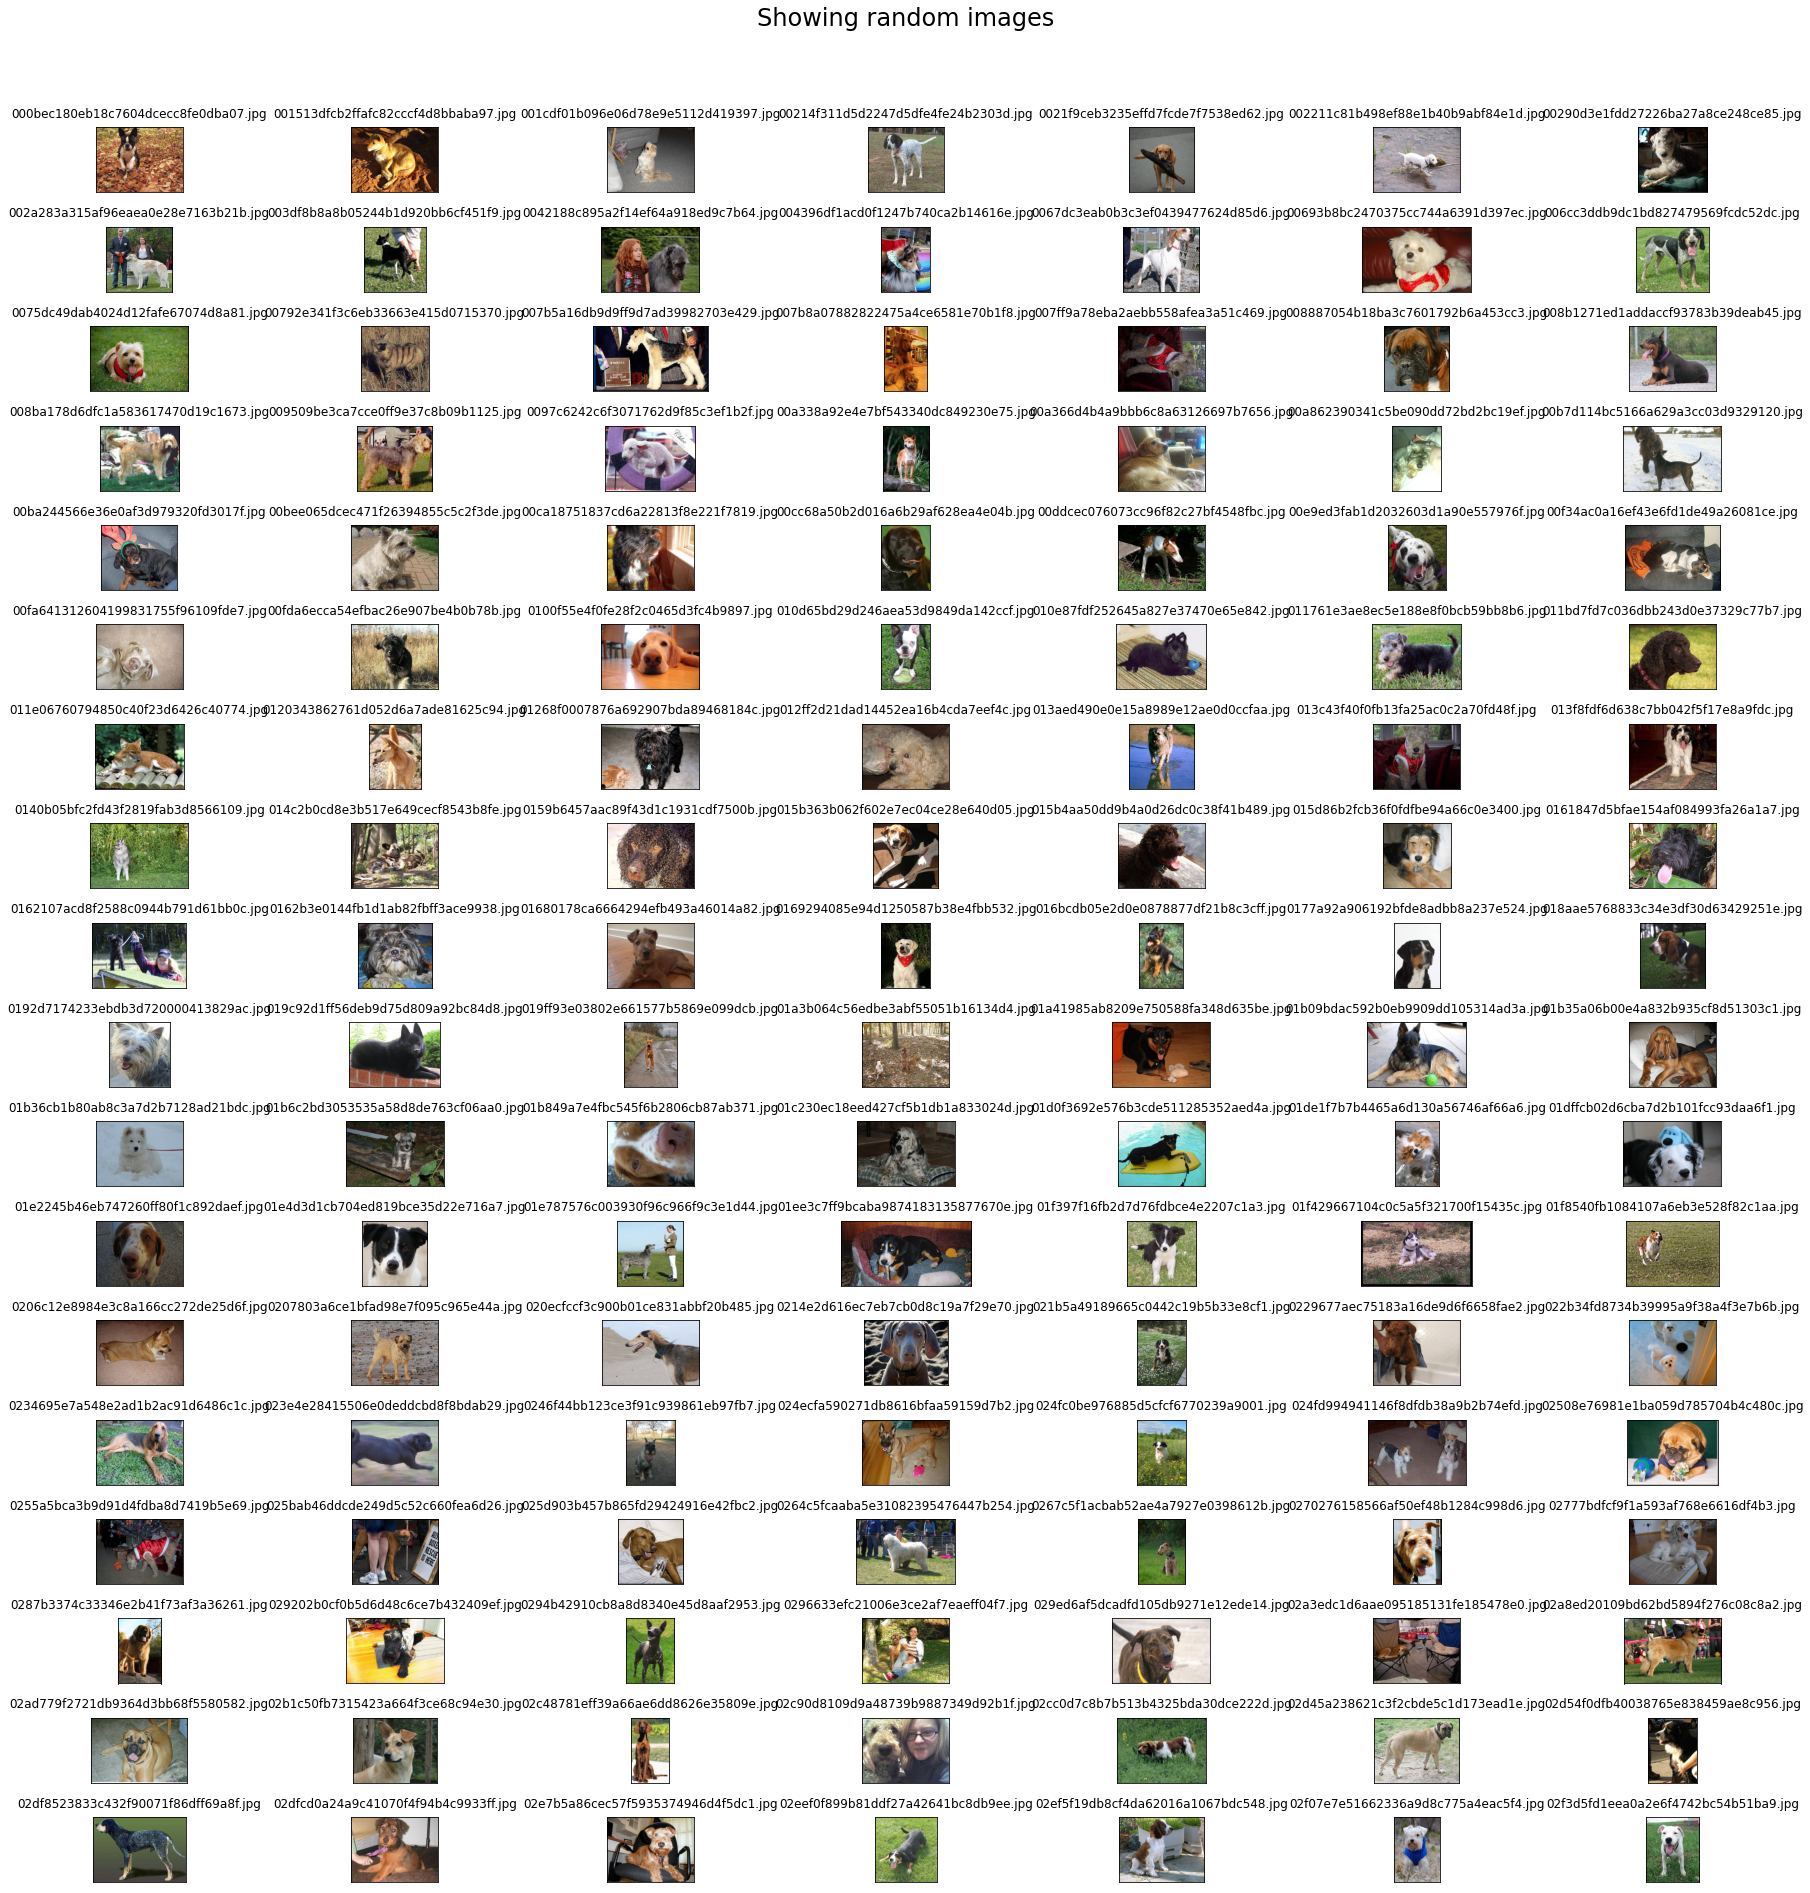

In [159]:
rows = 18
cols = 7
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing random images", y=1.05, fontsize=24) 
dog_id = 0
for i in range(rows):
  for j in range(cols):
    dog_selected = file_sorted[dog_id] 
    dog_id += 1
    dog_selected_images = os.path.join(data_path+'train',dog_selected)     
    img = plt.imread(dog_selected_images)
    ax[i][j].imshow(img)
    ax[i][j].set_title(dog_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

## Build base model

### ResNet Model1

In [5]:
model = ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
def build_model1(model):
  model1 = model.output
  model1 = Flatten()(model1)
  model1=Dropout(0.35)(model1)
  model1=Dense(units=1000,activation='relu')(model1)
  model1=Dropout(0.4)(model1)
  model1=Dense(units=750,activation='relu')(model1)
  model1=Dropout(0.4)(model1)
  model1=Dense(units=1000,activation='relu')(model1)
  model1=Dropout(0.8)(model1)
  model1 = Dense(120, activation='softmax')(model1)
  return model1

In [0]:
model1 = Model(inputs=model.input, outputs=build_model1(model))

In [11]:
for layer in model.layers:
    layer.trainable = False
    
model1.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
from keras.utils import plot_model

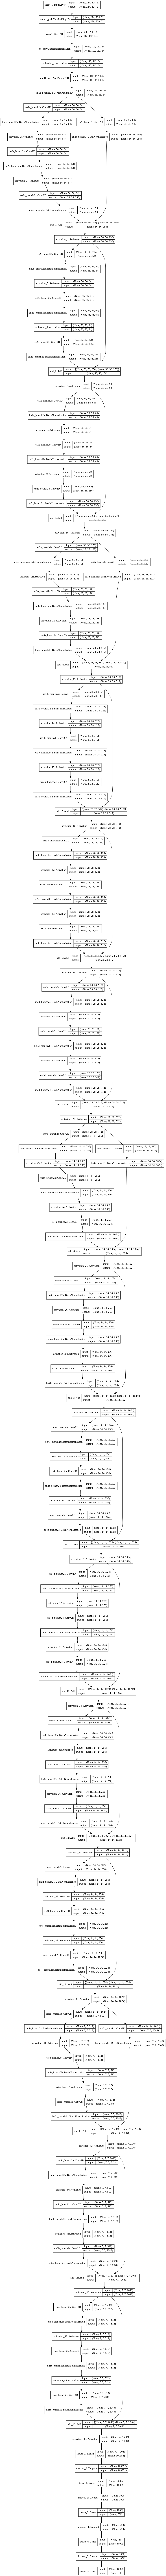

In [14]:
plot_model(model1, show_shapes=True, to_file='ResNet_new.png')

### CNN model 2

In [0]:
from keras.models import Sequential
from keras.layers import BatchNormalization,Conv2D,MaxPool2D,Dropout,Flatten,Dense

In [0]:
def CNN_model():
  model = Sequential([
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (224,224,3)),#Dropout(0.75),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)),
         Dropout(0.5),

         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)), 
         Dropout(0.5),

         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)), 
         Dropout(0.5),   

         Flatten(),   
         Dense(256, activation = "relu"),
         Dropout(0.75),   
         (Dense(120, activation = "softmax"))])


  model.compile(optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) , 
                loss = "categorical_crossentropy", metrics=["accuracy"])

  return model  

In [24]:
model2=CNN_model()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)     

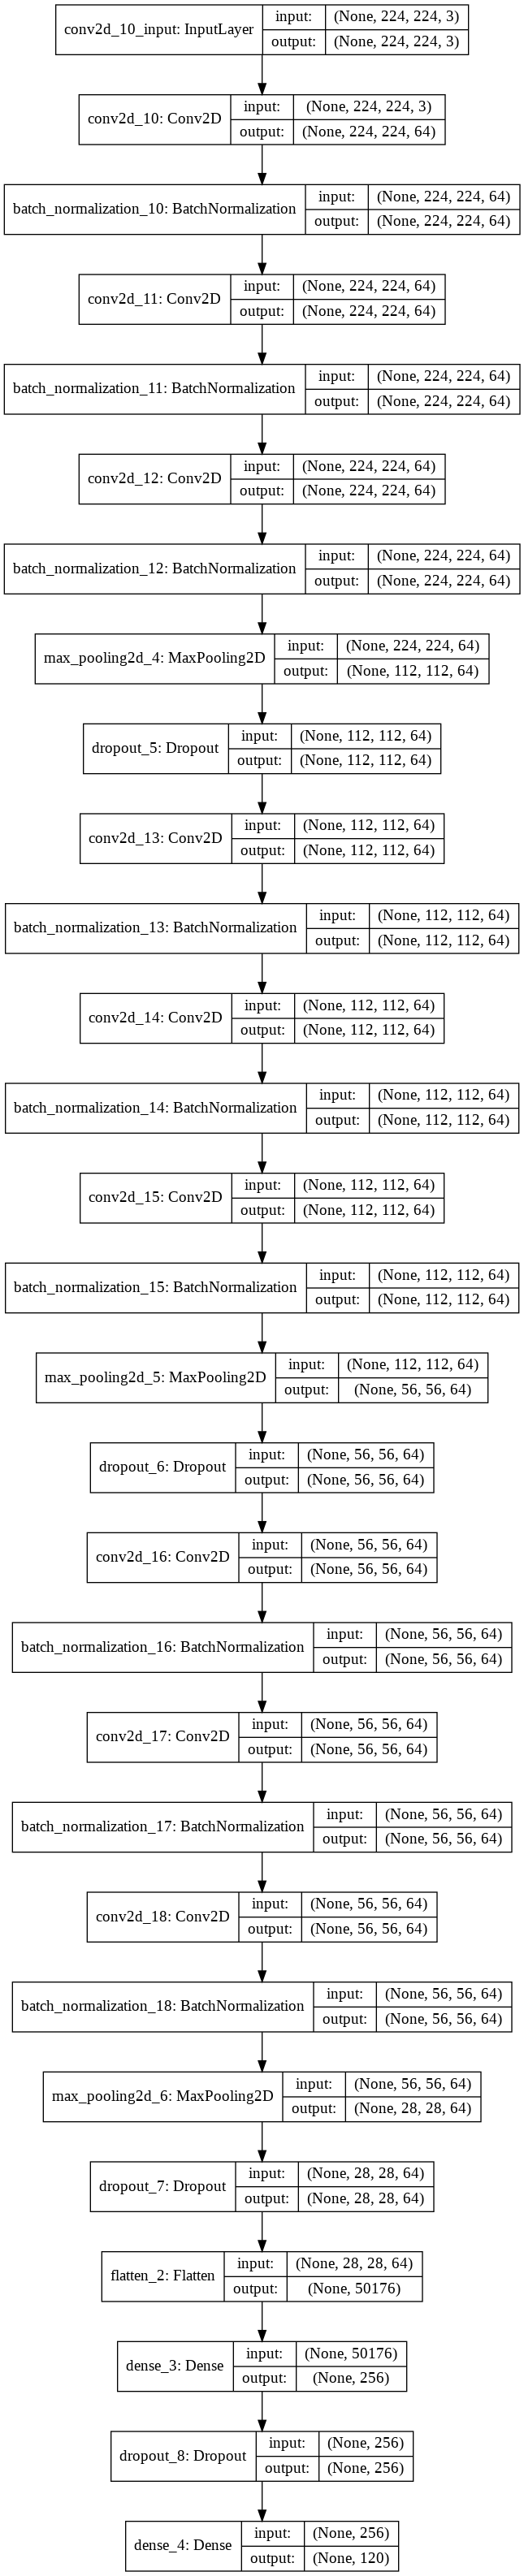

In [25]:
plot_model(model2, show_shapes=True, to_file='CNN_new.png')

## Image Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        #zoom_range=0.1,
                        horizontal_flip=True)

img = load_img('training_images/afghan_hound/feb16cf86c9dac6d476e3c372ba5c279.jpg') 
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='dog_breed', save_format='jpeg'):
    i += 1
    if i > 20:
        break  

## Model Fit

In [16]:
!pip install pyyaml h5py
import os, datetime
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint as mcp
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [0]:
run_eagerly = EarlyStopping(monitor='val_acc', patience=3, verbose=1) 

In [0]:
callbacks_list1 = [run_eagerly,tensorboard_callback]

### **Create a subset of data with few classes(12) 
- train_mini and test_mini for experiment**

In [0]:
def dataset_mini(img_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for img in img_list :
    print("Copying images into",img)
    copytree(os.path.join(src,img), os.path.join(dest,img))
      

### **Tune Inception Pretrained model 

In [0]:
import datetime


In [0]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(120,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer,tensorboard_callback])

model.save('model_trained_3class.hdf5')


Found 5250 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 1.9495 - accuracy: 0.2625
Epoch 00001: val_loss improved from inf to 1.69759, saving model to best_model_3class.hdf5
140/140 [==============================] - 59s 424ms/step - loss: 1.9495 - accuracy: 0.2625 - val_loss: 1.6976 - val_accuracy: 0.5285
Epoch 2/30
140/140 [==============================] - ETA: 0s - loss: 1.6269 - accuracy: 0.5040
Epoch 00002: val_loss improved from 1.69759 to 1.34139, saving model to best_model_3class.hdf5
140/140 [==============================] - 58s 415ms/step - loss: 1.6269 - accuracy: 0.5040 - val_loss: 1.3414 - val_accuracy: 0.6997
Epoch 3/30
140/140 [==============================] - ETA: 0s - loss: 1.3380 - accuracy: 0.6442
Epoch 00003: val_loss improved from 1.34139 to 1.01741, saving model to best_model_3class.hdf5
140/140 [==============================] - 58s 416ms/step - loss: 1.3380 - accu

## **Visualize the accuracy and loss **

# New Section

In [0]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


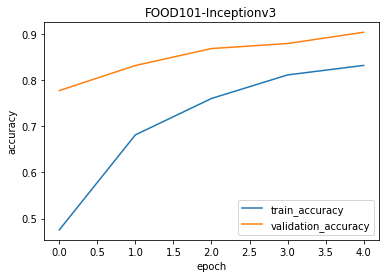

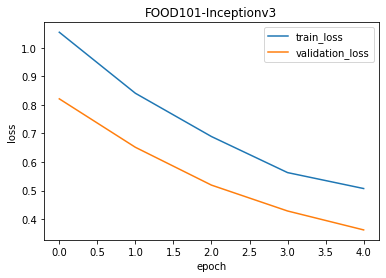

In [0]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [0]:
batch_size = 128
num_epochs = 50

In [0]:
!tensorboard dev upload --logdir ./logs --name "Image data generator TensorBoard"

## **Model Visualization**

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model1.layers[:8]]
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)

In [0]:
img_tensor = image.img_to_array(img_test6)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

In [0]:
print(img_tensor.shape)

In [0]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [0]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [0]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

In [0]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [0]:
from keras.utils import plot_model
plot_model(model1, show_shapes=True, to_file='CNN.png')

In [0]:
plot_model(mode2, show_shapes=True, to_file='ResNet.png')